In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
cd /content/drive/My Drive/DS/Practice/Identify_Digits

/content/drive/My Drive/DS/Practice/Identify_Digits


In [ ]:
data = './'

In [ ]:
ls

In [ ]:
!unzip -q Dataset.zip -d $data

**Import Lib**

In [17]:
import os
import cv2
from PIL import Image
import numpy as np
from tqdm import tqdm
from pickle import dump, load
from keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy import argmax
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.metrics import  confusion_matrix
import itertools

**Convert Image to array**

In [ ]:
def Dataset_loader(DIR, RESIZE, sigmaX=10):
    IMG = []
    x = sorted(os.listdir(DIR), key=len)
    for IMAGE_NAME in tqdm(x):
      PATH = os.path.join(DIR,IMAGE_NAME)
      _, ftype = os.path.splitext(PATH)
      if ftype == ".png":
          
          img = np.asarray(Image.open(PATH))
          
          img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
          img = cv2.resize(img, (RESIZE,RESIZE))

          IMG.append(np.array(img))
    return IMG

In [ ]:
cd /content/drive/My Drive/DS/Practice/Identify_Digits/Images

In [ ]:
X_test = np.array(Dataset_loader('./test', 28))

In [ ]:
X_train = np.array(Dataset_loader('./train', 28))

In [ ]:
cd /content/drive/My Drive/DS/Practice/Identify_Digits

/content/drive/My Drive/DS/Practice/Identify_Digits


**Encoded data**

In [ ]:
with open('train.pkl', 'wb') as encoded_train:
    dump(X_train, encoded_train)
with open('test.pkl', 'wb') as encoded_test:
  dump(X_test, encoded_test)

In [4]:
X_train = load(open("./train.pkl", "rb"))

X_test = load(open("./test.pkl", "rb"))

**Load label from file csv**

In [5]:
import pandas as pd
df = pd.read_csv("./train.csv")
label = df['label'].values.tolist()
y_train = np.zeros(len(label))
y_train = np.array(label)

**Show some image from train data**

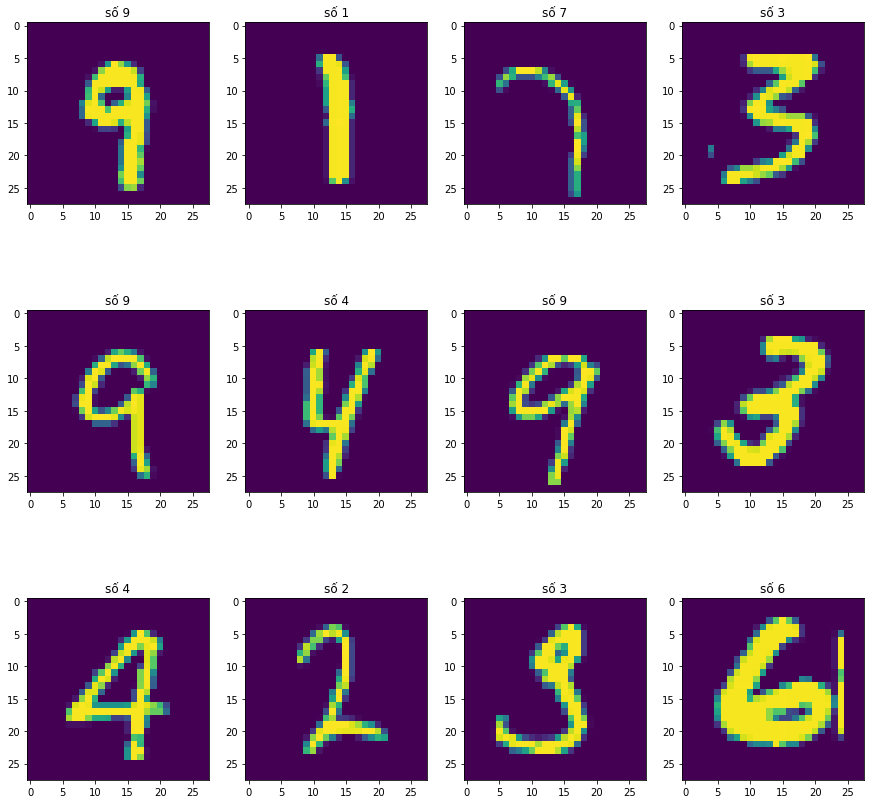

In [6]:
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 3

X_test_display = X_test
for i in range(1, columns*rows +1):
	ax = fig.add_subplot(rows, columns, i)
	plt.title('số '+str(y_train[i]))
	plt.imshow(X_train[i])
plt.show()


**Prepare data for Train and Validation**

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

#reshape data to 1 channel
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_val = X_val.reshape((X_val.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

#Normalize data range 0-1
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

**Define Model**

In [8]:
filter = 32
kernel_size = (3, 3)
input = (28, 28, 1) 


model = Sequential()
model.add(Conv2D(filter, kernel_size, activation='relu', input_shape=input))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

**Compile Model**

In [9]:
model.compile(loss='sparse_categorical_crossentropy',
			optimizer='adam',
			metrics=['accuracy'])

In [ ]:
cd /content/drive/My Drive/DS/Practice/Identify_Digits

/content/drive/My Drive/DS/Practice/Identify_Digits


**Check Point**

In [ ]:
filepath="top.weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor= 'val_accuracy' , verbose=1, save_best_only=True,
mode= max )
callbacks_list = [checkpoint]

**Fit Model**

In [ ]:
N = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=40, batch_size=32, callbacks=callbacks_list, verbose=2)

**Save weight**

In [ ]:
model.save_weights('my_Identify_Digits_Model.h5')

**Load weight**

In [10]:
model.load_weights('my_Identify_Digits_Model.h5')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


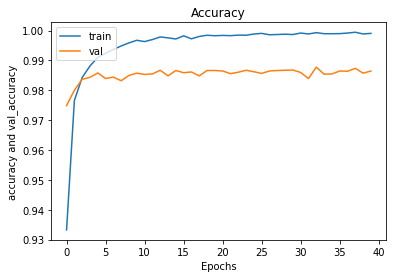

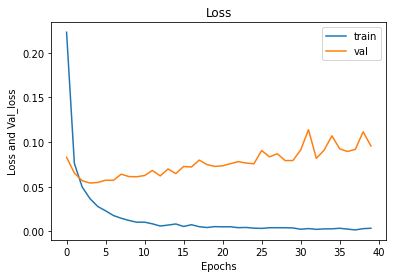

In [ ]:
print(N.history.keys())
fig = plt.figure()
#plot accuracy and val_awss2ccuracy
plt.plot(N.history['accuracy'])
plt.plot(N.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('accuracy and val_accuracy')
plt.title('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.figure()
#plot loss and val_loss
plt.plot(N.history['loss'])
plt.plot(N.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss and Val_loss')
plt.title('Loss')
plt.legend(['train', 'val'])
plt.show()

In [11]:
loss, acc = model.evaluate(X_val, y_val, verbose=2)
print('Accuracy: %.3f' % acc)
print('Loss: %.3f' % loss)

383/383 - 1s - loss: 0.0199 - accuracy: 0.9969
Accuracy: 0.997
Loss: 0.020


In [12]:
y_pred = model.predict(X_test)

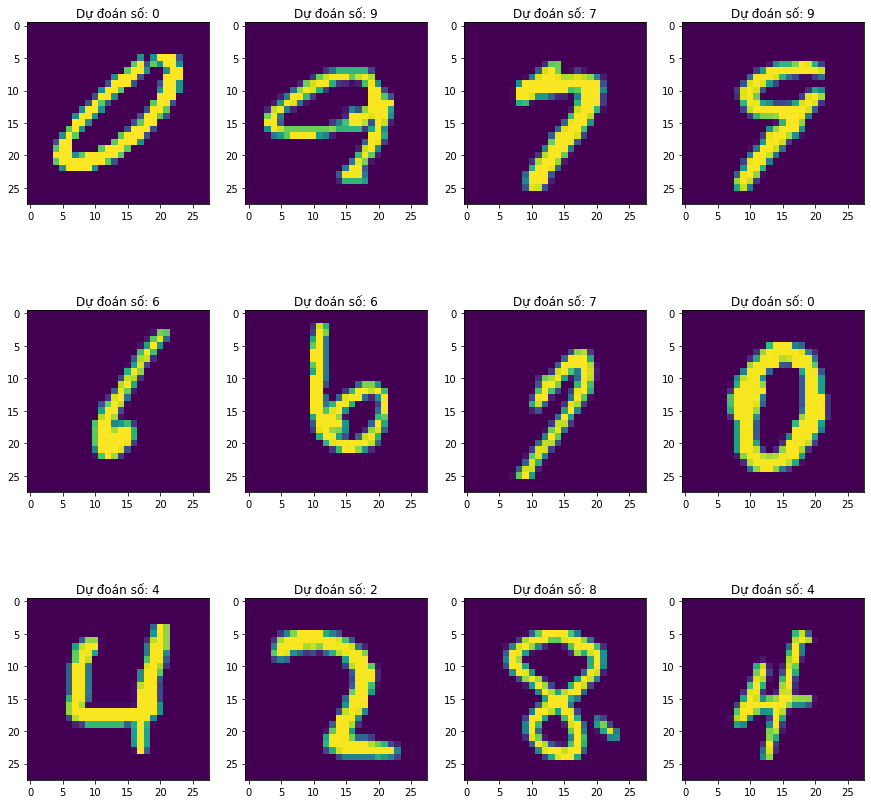

In [ ]:
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 3


for i in range(1, columns*rows +1):
	ax = fig.add_subplot(rows, columns, i)
	plt.title("Dự đoán số: "+ str(np.argmax(y_pred[i])))
	plt.imshow(X_test_display[i])
plt.show()

In [ ]:
y_predict = [np.argmax(y_pred[i]) for i in range(y_pred.shape[0])]

In [ ]:
cd /content/drive/My Drive/DS/Practice/Identify_Digits

/content/drive/My Drive/DS/Practice/Identify_Digits


In [ ]:
file_name = [str(i)+'.png' for i in range(49000, 70000,1)]
values = y_predict
  
dict = {'filename': file_name, 'label': values}  
     
df = pd.DataFrame(dict) 
  
# # saving the dataframe 
df.to_csv('file1.csv') 

**Confuse Matrix**

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

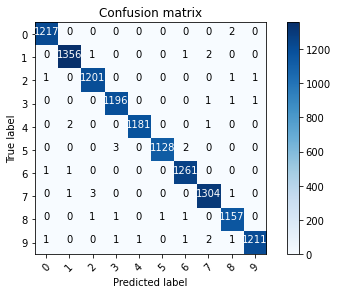

In [18]:
# Predict the values from the validation dataset
y_val_pred = model.predict(X_val)

# Convert predictions classes to one hot vectors 
y_val_pred_classes = np.argmax(y_val_pred, axis = 1)

# compute the confusion matrix
confusion_mtx = confusion_matrix(y_val, y_val_pred_classes) 
# plot the confusion matrix

plot_confusion_matrix(confusion_mtx, classes = range(10))